**<center>CAP-400 - Visualização e Análise Computacional de Séries Temporais</center>**

**<center>Professor Dr. Reinaldo Rosa</center>**

# <center>Estudo: Característica de Euler</center>

**<center>André Ricardo Fazanaro Martinon</center>**

**<center>20 de janeiro de 2020</center>**

## 1. Introdução

<https://en.wikipedia.org/wiki/Euler_characteristic>

A biblioteca scikit-image a partir da versão 0.18 fornece o método **euler_number**. Mas ao aplicar diretamente este método em cada snapshot do CML obtemos uma série temporal constante, com valor 1. E isto ocorre para todos os datasets.

Verificando a [documentação](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.euler_number), podemos constatar que o método calcula a característica de Euler para uma imagem binária. No entanto as imagens, matrizes, de cada snapshot possuem valores reais entre 0 e 1, desta forma será necessário binarizar os snapshots. Então o primeiro questionamento que temos é:

## 2. Qual limiar devemos utilizar para binarizar o snapshot?

o código a seguir demonstra as diferenças na conectividade dependendo do limiar que escolhemos para binarizar a imagem

In [1]:
%matplotlib inline

import math
import matplotlib.pyplot as plt
import numpy as np

from skimage.measure import euler_number, label

As classes e métodos do pacote cml fazem parte da implementação de mapas acoplados desenvolvida para o trabalho e resolução da lista de exercícios da disciplina CAP-400.

In [2]:
from cml.initial_conditions import RandomInitialCondition, GaussianInitialCondition
from cml.plot import plot_lattice

Primeiramente criaremos uma grade de tamanho 40x40 com condições iniciais aleatórias.

In [3]:
random = RandomInitialCondition()
random.generate()

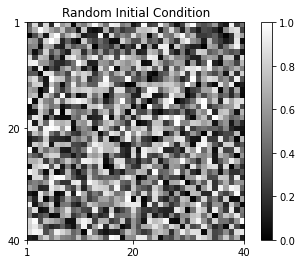

In [4]:
_ = plot_lattice(random.lattice, str(random))

A seguir podemos verificar as diferenças na grade binarizada de acordo com o limiar escolhido. Os pixels pretos (zero) equivalem ao "background" da grade e dependendo da situação serão considerados como furos pelo método euler_number. Os pixels brancos (um) equivalem aos objetos que devem ser encontrados pelo algoritmo. Estes objetos podem, ou não, estar conectados. 

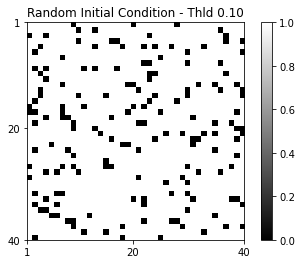

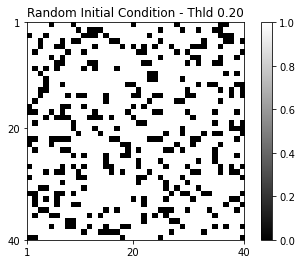

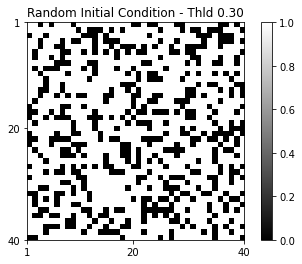

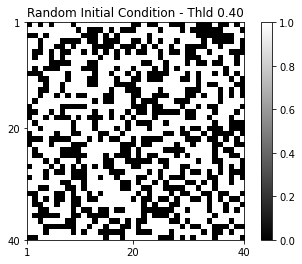

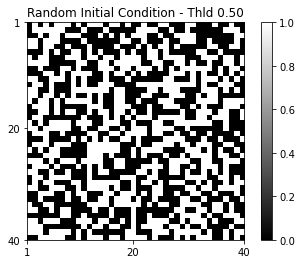

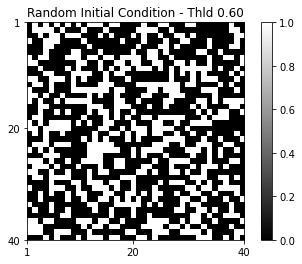

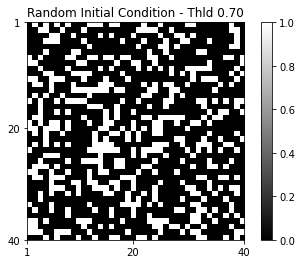

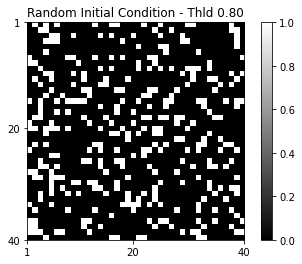

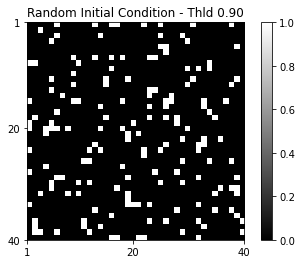

In [5]:
for thld in np.linspace(0.1, 0.9, 9):
    _ = plot_lattice(random.lattice, f'{random} - Thld {thld:.2f}', thld)

In [6]:
print(f'Euler number for original lattice: {euler_number(random.lattice.u)}')

for thld in np.linspace(0.1, 0.9, 9):
    img = random.lattice.u.copy()
    img[img >= thld] = 1.0
    img[img < thld] = 0.0
    print(f'Euler number for binary lattice with threshold {thld:.1f}: {euler_number(img)}')

Euler number for original lattice: 1
Euler number for binary lattice with threshold 0.1: -117
Euler number for binary lattice with threshold 0.2: -169
Euler number for binary lattice with threshold 0.3: -179
Euler number for binary lattice with threshold 0.4: -135
Euler number for binary lattice with threshold 0.5: -73
Euler number for binary lattice with threshold 0.6: 1
Euler number for binary lattice with threshold 0.7: 81
Euler number for binary lattice with threshold 0.8: 124
Euler number for binary lattice with threshold 0.9: 106


Os valores negativos indicam que temos mais furos que objetos na imagens. E valores positivos indicam mais objetos que furos.

In [7]:
help(euler_number)

Help on function euler_number in module skimage.measure._regionprops_utils:

euler_number(image, connectivity=None)
    Calculate the Euler characteristic in binary image.
    
    For 2D objects, the Euler number is the number of objects minus the number
    of holes. For 3D objects, the Euler number is obtained as the number of
    objects plus the number of holes, minus the number of tunnels, or loops.
    
    Parameters
    ----------
    image: (N, M) ndarray or (N, M, D) ndarray.
        2D or 3D images.
        If image is not binary, all values strictly greater than zero
        are considered as the object.
    connectivity : int, optional
        Maximum number of orthogonal hops to consider a pixel/voxel
        as a neighbor.
        Accepted values are ranging from  1 to input.ndim. If ``None``, a full
        connectivity of ``input.ndim`` is used.
        4 or 8 neighborhoods are defined for 2D images (connectivity 1 and 2,
        respectively).
        6 or 26 neighbo

Como podemos verificar na documentação do método **euler_number** ele possui o parâmetro connectivity, que define a forma como o algoritmo interpreta a conectividade dos pixels.

Para connectivity=1 é considerada uma vizinhança de 4 pixels (superior, inferior, direita e esquerda). Já connectivity=2 considera uma vizinhança de 8 pixels, além dos 4 pixels de connectivity=1 as diagonais também serão consideradas.

A seguir demonstramos a diferença de valores de acordo com a conectividade escolhida.

In [8]:
print(f'Euler number for original lattice: {euler_number(random.lattice.u, connectivity=1)}')
print(f'Euler number for original lattice: {euler_number(random.lattice.u, connectivity=2)}')

for thld in np.linspace(0.1, 0.9, 9):
    img = random.lattice.u.copy()
    img[img >= thld] = 1.0
    img[img < thld] = 0.0
    print(f'Euler number for binary lattice with threshold {thld:.1f}: {euler_number(img, connectivity=1)}')
    print(f'Euler number for binary lattice with threshold {thld:.1f}: {euler_number(img, connectivity=2)}')

Euler number for original lattice: 1
Euler number for original lattice: 1
Euler number for binary lattice with threshold 0.1: -88
Euler number for binary lattice with threshold 0.1: -117
Euler number for binary lattice with threshold 0.2: -87
Euler number for binary lattice with threshold 0.2: -169
Euler number for binary lattice with threshold 0.3: -40
Euler number for binary lattice with threshold 0.3: -179
Euler number for binary lattice with threshold 0.4: 35
Euler number for binary lattice with threshold 0.4: -135
Euler number for binary lattice with threshold 0.5: 118
Euler number for binary lattice with threshold 0.5: -73
Euler number for binary lattice with threshold 0.6: 178
Euler number for binary lattice with threshold 0.6: 1
Euler number for binary lattice with threshold 0.7: 214
Euler number for binary lattice with threshold 0.7: 81
Euler number for binary lattice with threshold 0.8: 193
Euler number for binary lattice with threshold 0.8: 124
Euler number for binary lattic

Considerando uma vizinhança com mais pixels, a princípio, teremos menos objetos na imagem pois aumentaremos a conectividade entre eles.

Além do método **euler_number** a biblioteca scikit-image fornece o método **label**, que rótula os objetos encontrados na imagem. A diferença é que ela não leva os furos em consideração, e ao invés de retornar somente um número ela retorna uma matriz (do mesmo tamanho da matriz de entrada) com os pixels (um) rotulados sequencialmente. Pixels conectados recebem o mesmo rótulo.

In [9]:
help(label)

Help on function label in module skimage.measure._label:

label(input, background=None, return_num=False, connectivity=None)
    Label connected regions of an integer array.
    
    Two pixels are connected when they are neighbors and have the same value.
    In 2D, they can be neighbors either in a 1- or 2-connected sense.
    The value refers to the maximum number of orthogonal hops to consider a
    pixel/voxel a neighbor::
    
      1-connectivity     2-connectivity     diagonal connection close-up
    
           [ ]           [ ]  [ ]  [ ]             [ ]
            |               \  |  /                 |  <- hop 2
      [ ]--[x]--[ ]      [ ]--[x]--[ ]        [x]--[ ]
            |               /  |  \             hop 1
           [ ]           [ ]  [ ]  [ ]
    
    Parameters
    ----------
    input : ndarray of dtype int
        Image to label.
    background : int, optional
        Consider all pixels with this value as background pixels, and label
        them as 0. 

In [10]:
print(f'Euler number for original lattice: {euler_number(random.lattice.u, connectivity=1)}')
print(f'Objects for original lattice: {label(random.lattice.u, connectivity=1).max()}')
print(f'Euler number for original lattice: {euler_number(random.lattice.u, connectivity=2)}')
print(f'Objects for original lattice: {label(random.lattice.u, connectivity=2).max()}')

for thld in np.linspace(0.1, 0.9, 9):
    img = random.lattice.u.copy()
    img[img >= thld] = 1.0
    img[img < thld] = 0.0
    print()
    print(f'Euler number for binary lattice with threshold {thld:.1f}: {euler_number(img, connectivity=1)}')
    print(f'Objects for binary lattice with threshold {thld:.1f}: {label(img, connectivity=1).max()}')
    print(f'Euler number for binary lattice with threshold {thld:.1f}: {euler_number(img, connectivity=2)}')
    print(f'Objects for binary lattice with threshold {thld:.1f}: {label(img, connectivity=2).max()}')

Euler number for original lattice: 1
Objects for original lattice: 0
Euler number for original lattice: 1
Objects for original lattice: 0

Euler number for binary lattice with threshold 0.1: -88
Objects for binary lattice with threshold 0.1: 1
Euler number for binary lattice with threshold 0.1: -117
Objects for binary lattice with threshold 0.1: 1

Euler number for binary lattice with threshold 0.2: -87
Objects for binary lattice with threshold 0.2: 3
Euler number for binary lattice with threshold 0.2: -169
Objects for binary lattice with threshold 0.2: 1

Euler number for binary lattice with threshold 0.3: -40
Objects for binary lattice with threshold 0.3: 18
Euler number for binary lattice with threshold 0.3: -179
Objects for binary lattice with threshold 0.3: 1

Euler number for binary lattice with threshold 0.4: 35
Objects for binary lattice with threshold 0.4: 51
Euler number for binary lattice with threshold 0.4: -135
Objects for binary lattice with threshold 0.4: 3

Euler number

A próxima questão que podemos tentar responder é:
    
## 3. Qual o tamanho de cada objeto presente na imagem?

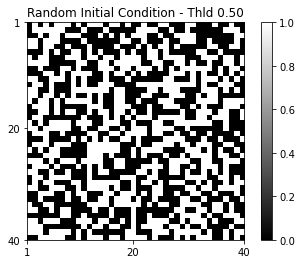

In [11]:
thld = 0.5
_ = plot_lattice(random.lattice, f'{random} - Thld {thld:.2f}', thld)

In [12]:
img = random.lattice.u.copy()
img[img >= thld] = 1.0
img[img < thld] = 0.0
   
labels = label(img, connectivity=1)
display(labels)

array([[  0,   1,   0, ...,  10,   0,   0],
       [  0,   1,   1, ...,  10,  10,   0],
       [  0,   0,   1, ...,   0,  10,  10],
       ...,
       [112, 112, 112, ..., 119,   0,   0],
       [112, 112, 112, ...,   0, 123, 123],
       [  0,   0, 112, ...,   0, 123,   0]])

In [13]:
labels.max()

124

In [14]:
labels_hist = np.histogram(labels, bins=labels.max(), range=(1, labels.max()))

In [15]:
print(len(labels_hist[0]))
print(labels_hist[0])

124
[ 28   1   3   2   1   9   2  10   1   9   1   1   1   3   1   1   3   1
   4   1 101   3   1   4   1   1   8   1   1  68   1  19   1   7   2  22
   2   1   1   9   1   5   1   1   1   3   1  14   5   1   2   1   2   5
   1  21  12   1  50   2  41   1   1   1   1   1   1   1   9   2   1   2
  19   1   1   9   1  13   3   4  12   1   1   1  15  27   6   6   3   3
   4   2   1   1   1  19   1   1   1   3   3   1   2   4   7   4   2   5
  13   1   1  17   3   4   1   1   2  14   1   2   4   2   3   2]


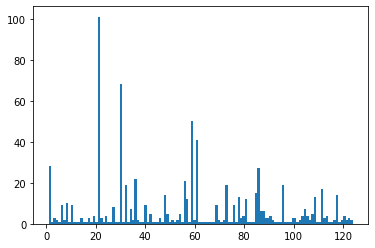

In [16]:
_ = plt.hist(labels.flatten(), labels_hist[1])

## 4. Funcionais de Minkowski

Do conteúdo das aulas:

* $F(\rho)$ - superfície de cobertura
* $U(\rho)$ - contorno
* $\chi(\rho)$ - característica de Euler (conectividade)



$\chi(\Gamma) = (\frac{1}{2\pi})(\Gamma - \Gamma_0)\exp(-\frac{1}{2}(\Gamma - \Gamma_0)^2)$

$\Gamma = r/L$

Onde:

* r = raio de aspecto, isto é, o tamanho de cada objeto da grade.
* L = tamanho da grade, como é 2D é a quantidade total de elementos da grade.
* $\Gamma_0$ = Valor de $\Gamma$ do primeiro snapshot.
* $\Gamma$ = Valor médio do $\Gamma$ de cada objeto da grade.

E o gráfico apresentado não é uma série temporal. No eixo $x$ temos valores de $\Gamma$ e no eixo $y$ o respectivo valor da característica de Euler $\chi(\Gamma)$.

No artigo "*Structural complexity of disordered surfaces: Analysing the porous silicon SFM patterns*", existem algumas definições para r, L e $\Gamma_0$. Mas ainda não ficou claro como obtemos estes parâmetros da imagem (snapshot) e como isso evolue no tempo para obtermos uma série temporal para treinar a LSTM.

**Do artigo**:

>    In our approach, for given irregular amplitude field distributed in
    a 2D integral scale $L\times L$, it is taken as the excursion set of all points above a certain aspect ratio threshold, $\Gamma = r/L$, and measures the Euler characteristic as function of this threshold, being r the linear local scale of a given amplitude distribution:
>
>    $\chi(\Gamma) = (\frac{1}{2\pi})(\Gamma - \Gamma_0)\exp(-\frac{1}{2}(\Gamma - \Gamma_0)^2)$
>
>    where $\Gamma_0$ denotes the characteristic length of the correspondent binary global structure.

## 6. Cálculo da característica de Euler

In [17]:
from cml.boundary_conditions import ToroidalBoundaryCondition, SteadyBoundaryCondition
from cml.maps import LogisticMap
from cml.couplings import FourNeighborCoupling
from cml.evolution import Evolution
from cml import CML


datasetcml1 = CML(RandomInitialCondition(),
                  SteadyBoundaryCondition(0.0),
                  LogisticMap(3.9),
                  FourNeighborCoupling(0.5),
                  grid_size=40)

datasetcml1_evolution = Evolution(datasetcml1, iterations=1024)
datasetcml1_evolution.run()

datasetcml2 = CML(GaussianInitialCondition(),
                  SteadyBoundaryCondition(0.0),
                  LogisticMap(3.9),
                  FourNeighborCoupling(0.75),
                  grid_size=40)

datasetcml2_evolution = Evolution(datasetcml2, iterations=1024)
datasetcml2_evolution.run()

In [18]:
def chi(gama, gama0):
     return (1.0/(2.0*np.pi))*(gama-gama0)*math.exp(-0.5*(gama-gama0)**2)

def euler_characteristic(snapshots, thld):
    chi_gama = []
    gamas = []
    gamas.append(0)
    for i, snapshot in enumerate(snapshots):
        # Binarizar a grade
        img = snapshot.u.copy()
        img[img >= thld] = 1.0
        img[img < thld] = 0.0
    
        # Descobrir os objetos presentes na grade e seus tamanhos em pixels
        labels = label(img, connectivity=1)
        labels_hist = np.histogram(labels, bins=labels.max(), range=(1, labels.max()))
    
        # Calcular o valor médio do gamma
        gama = 0
        for size in labels_hist[0]:
            gama = gama + size/img.size    
        gama = gama / labels.max()

        # Calcular a característica de Euler para o valor médio
        chi_gama.append(chi(gama, gamas[0]))
        gamas.insert(i, gama)
    _ = gamas.pop()
    
    return gamas, chi_gama

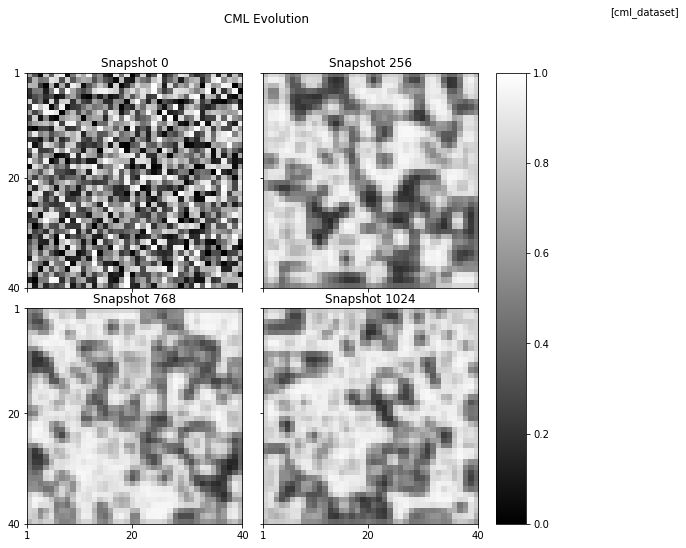

In [19]:
datasetcml1_evolution.plot(show=True)

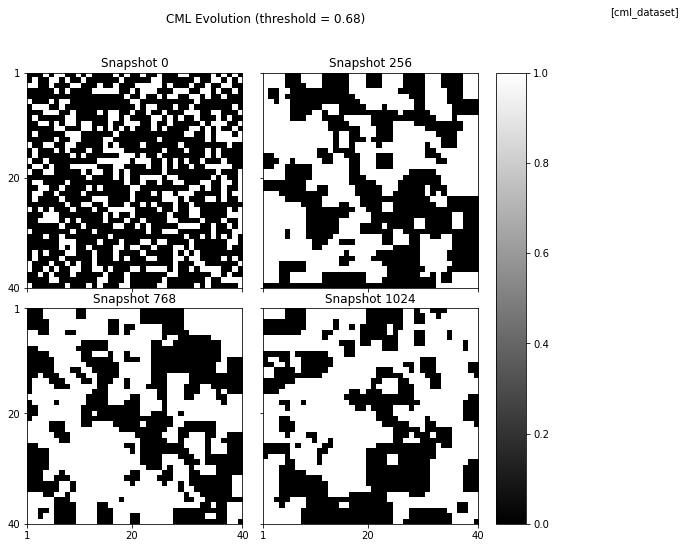

In [20]:
thld = 0.68  # Encontrei este limiar empiricamente.
datasetcml1_evolution.plot(show=True, binary_threshold=thld)

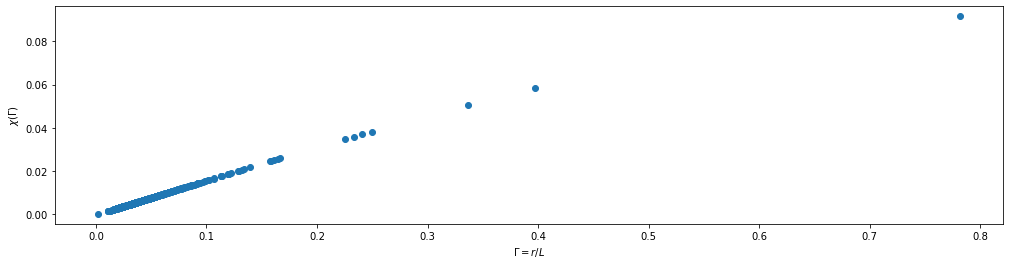

In [21]:
gamas, chi_gama = euler_characteristic(datasetcml1_evolution.snapshots, thld)
plt.figure(figsize=(17,4))
plt.scatter(gamas, chi_gama)
plt.ylabel("$\chi(\Gamma)$")
_ = plt.xlabel("$\Gamma=r/L$")

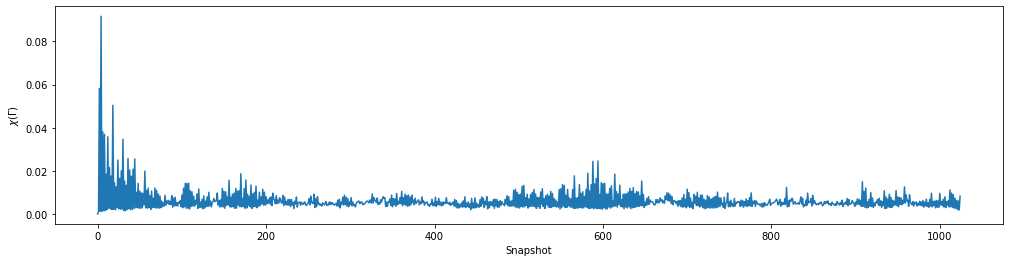

In [22]:
plt.figure(figsize=(17,4))
plt.plot(chi_gama)
plt.ylabel("$\chi(\Gamma)$")
_ = plt.xlabel("Snapshot")

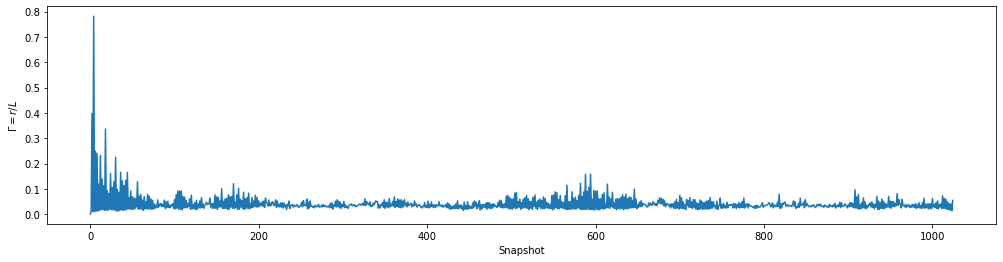

In [23]:
plt.figure(figsize=(17,4))
plt.plot(gamas)
plt.ylabel("$\Gamma=r/L$")
_ = plt.xlabel("Snapshot")

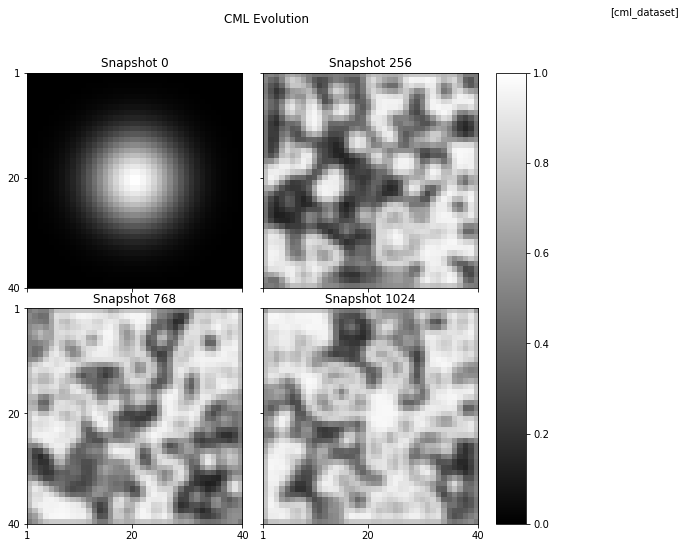

In [24]:
datasetcml2_evolution.plot(show=True)

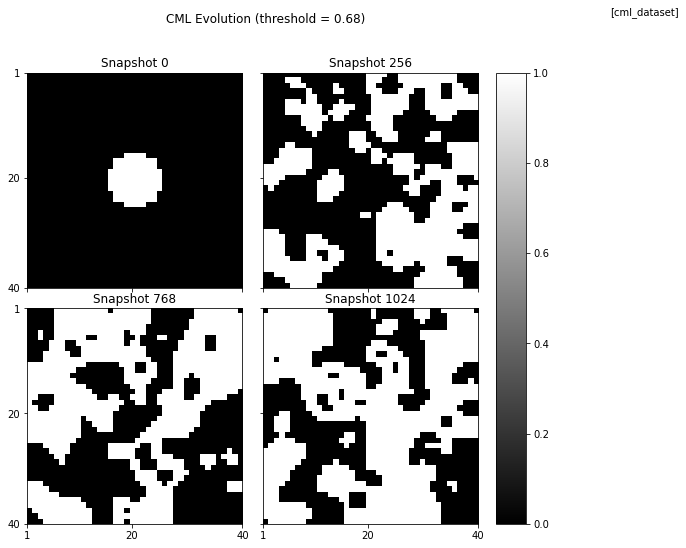

In [25]:
thld = 0.68  # Encontrei este limiar empiricamente.
datasetcml2_evolution.plot(show=True, binary_threshold=thld)

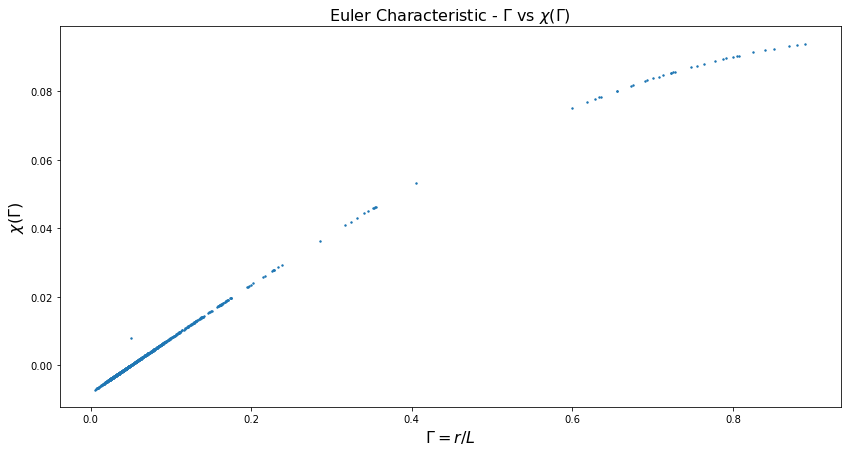

In [26]:
gamas, chi_gama = euler_characteristic(datasetcml2_evolution.snapshots, thld)

plt.figure(figsize=(14, 7))
plt.title('Euler Characteristic - $\Gamma$ vs $\chi(\Gamma)$', fontsize=16)
plt.ylabel("$\chi(\Gamma)$", fontsize=16)
plt.xlabel("$\Gamma=r/L$", fontsize=16)
_ = plt.scatter(gamas, chi_gama, s=2)


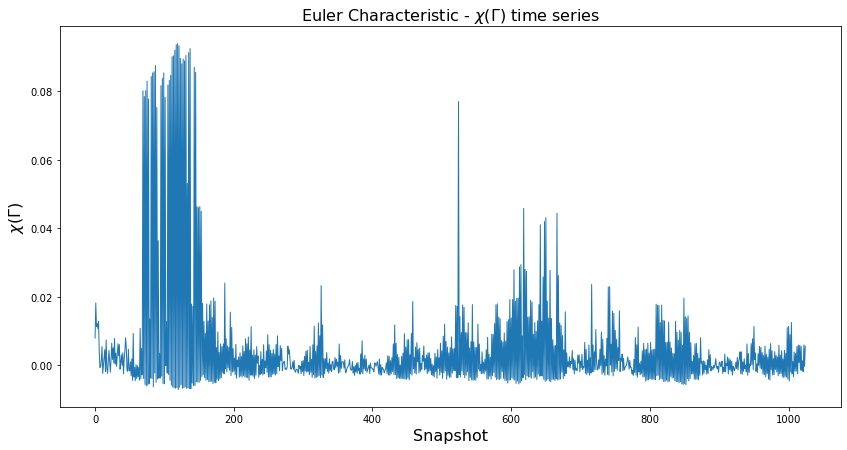

In [27]:
plt.figure(figsize=(14, 7))
plt.title('Euler Characteristic - $\chi(\Gamma)$ time series', fontsize=16)
plt.plot(range(len(chi_gama)), chi_gama, linewidth=1)
plt.ylabel("$\chi(\Gamma)$", fontsize=16)
_ = plt.xlabel("Snapshot", fontsize=16)

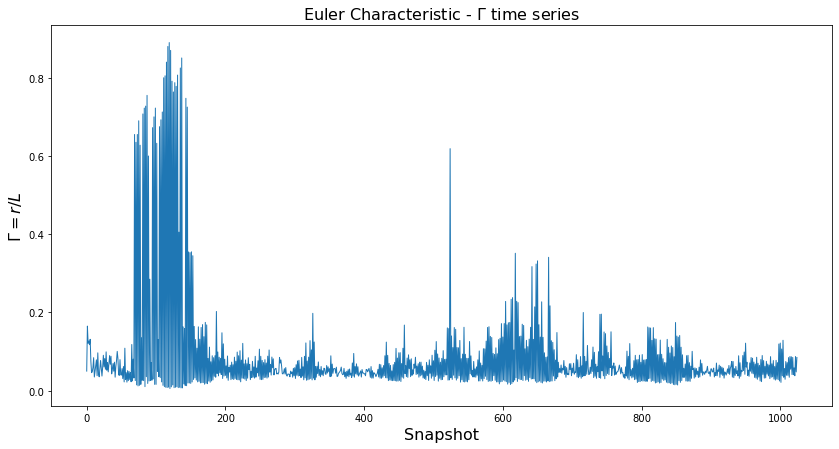

In [28]:
plt.figure(figsize=(14, 7))
plt.title('Euler Characteristic - $\Gamma$ time series', fontsize=16)
plt.plot(range(len(gamas)), gamas, linewidth=1)
plt.ylabel("$\Gamma=r/L$", fontsize=16)
_ = plt.xlabel("Snapshot", fontsize=16)

## 7. Conclusões

O gráfico chi(gamma) x snapshots é o que deve ser considerado como a característica de Euler, e deverá ser utilizado no treinamento da LSTM.